## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Modelado

---

En esta libreta se comienzan a ejecutar las actividades correspondientes a la fase de modelado. 

---

### Carga de librerias a utilizar

In [16]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Lectura del dataset generado previamente

In [17]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../data/final/datos_finales.csv', sep=';')
datos.head()

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil_N,estado_credito_N,estado_cliente_N,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,genero,nivel_educativo,personas_a_cargo
0,30_a_50,1k_a_4k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_18,4_a_9,menor_24,C,C,1,1000,2,PROPIA,EDUCACIÓN,N,M,SECUNDARIO_COMPLETO,3.0
1,15_a_30,1k_a_4k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,39_a_60,4_a_9,menor_24,C,P,1,35000,2,ALQUILER,SALUD,N,M,UNIVERSITARIO_COMPLETO,3.0
2,15_a_30,1k_a_4k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,39_a_60,4_a_9,menor_24,C,P,1,35000,4,ALQUILER,SALUD,Y,M,DESCONOCIDO,1.0
3,15_a_30,1k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,19_a_39,menor_4,menor_24,N,P,1,2500,2,PROPIA,INVERSIONES,N,F,SECUNDARIO_COMPLETO,4.0
4,15_a_30,menor_1k,3k_a_5k,menor_2y,7p_a_15p,50k_a_100k,39_a_60,4_a_9,mayor_25,C,P,1,35000,3,ALQUILER,EDUCACIÓN,N,M,UNIVERSITARIO_INCOMPLETO,3.0


### Revisión de meta-datos

In [18]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Descripción del dataset 'datos_completos'")
reporte_descripcion_dataset(datos)

Descripción del dataset 'datos_completos'
Columnas del dataset:

operaciones_ult_12m
gastos_ult_12m
limite_credito_tc
antiguedad_cliente
tasa_interes
ingresos
pct_ingreso
antiguedad_empleado
edad
estado_civil_N
estado_credito_N
estado_cliente_N
importe_solicitado
duracion_credito
situacion_vivienda
objetivo_credito
falta_pago
genero
nivel_educativo
personas_a_cargo

Cantidad de filas: 8867


### Armado de los sets de entrenamiento y testeo

In [19]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.falta_pago.values

features = datos[['operaciones_ult_12m', 'gastos_ult_12m', 'limite_credito_tc',
       'antiguedad_cliente', 'tasa_interes', 'ingresos', 'pct_ingreso',
       'antiguedad_empleado', 'edad', 'importe_solicitado', 'duracion_credito',
       'situacion_vivienda', 'objetivo_credito', 'estado_civil_N',
       'estado_credito_N', 'estado_cliente_N', 'genero',
       'nivel_educativo', 'personas_a_cargo']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_civil_N,estado_credito_N,estado_cliente_N,genero,nivel_educativo,personas_a_cargo
0,30_a_50,1k_a_4k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_18,4_a_9,menor_24,1000,2,PROPIA,EDUCACIÓN,C,C,1,M,SECUNDARIO_COMPLETO,3.0
1,15_a_30,1k_a_4k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,39_a_60,4_a_9,menor_24,35000,2,ALQUILER,SALUD,C,P,1,M,UNIVERSITARIO_COMPLETO,3.0
2,15_a_30,1k_a_4k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,39_a_60,4_a_9,menor_24,35000,4,ALQUILER,SALUD,C,P,1,M,DESCONOCIDO,1.0
3,15_a_30,1k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,19_a_39,menor_4,menor_24,2500,2,PROPIA,INVERSIONES,N,P,1,F,SECUNDARIO_COMPLETO,4.0
4,15_a_30,menor_1k,3k_a_5k,menor_2y,7p_a_15p,50k_a_100k,39_a_60,4_a_9,mayor_25,35000,3,ALQUILER,EDUCACIÓN,C,P,1,M,UNIVERSITARIO_INCOMPLETO,3.0


In [20]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,importe_solicitado,duracion_credito,estado_cliente_N,personas_a_cargo,operaciones_ult_12m_15_a_30,operaciones_ult_12m_30_a_50,operaciones_ult_12m_50_a_75,operaciones_ult_12m_75_a_100,operaciones_ult_12m_mayor_100,operaciones_ult_12m_menor_15,...,estado_credito_N_C,estado_credito_N_P,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,1000,2,1,3.0,False,True,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,35000,2,1,3.0,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
2,35000,4,1,1.0,True,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False
3,2500,2,1,4.0,True,False,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
4,35000,3,1,3.0,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [21]:
seed = 35 #semilla para los modelos

In [22]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [23]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=seed)

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
importe_solicitado                          10400.0
duracion_credito                                4.0
estado_cliente_N                                1.0
personas_a_cargo                                2.0
operaciones_ult_12m_15_a_30                   False
                                             ...   
nivel_educativo_POSGRADO_COMPLETO             False
nivel_educativo_POSGRADO_INCOMPLETO           False
nivel_educativo_SECUNDARIO_COMPLETO           False
nivel_educativo_UNIVERSITARIO_COMPLETO         True
nivel_educativo_UNIVERSITARIO_INCOMPLETO      False
Name: 3051, Length: 63, dtype: object
--------------------------------------------------
Label del registro: 
N

##################################################
##################################################

Un registro de testeo: 
importe_solicitado                          11500.0
duracion_credito                                3.0
estado_cliente_N                                1.0
p

In [24]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()

In [25]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

#### ZeroR

In [26]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(train_data, train_labels)

2024/11/24 20:57:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e61a21b310154087aeb786723dd9addd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
c:\Users\Acer\Downloads\Rodrigo\Metodología\Portafolio\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


DummyClassifier(constant=None, random_state=None, strategy='prior')

In [27]:
prediction = clf.predict(test_data)

print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.8389715832205683
Vista de una muestra de valores de predicción y datos de testeo:
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
['N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N']


----
Se pasa a configurar la serie de experimentos en **mlflow**

In [28]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Prueba #1")
mlflow.autolog()

2024/11/24 20:57:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Regresión Logística

In [29]:
from sklearn.linear_model import LogisticRegression

with mlflow.start_run(run_name='Logistic Regression'):
    lreg = LogisticRegression(solver = 'liblinear', random_state=seed)

    lreg.fit(train_data, train_labels)

Rendimiento obtenido: 0.8804691023906179
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.94      0.93      1860
           Y       0.65      0.57      0.61       357

    accuracy                           0.88      2217
   macro avg       0.78      0.76      0.77      2217
weighted avg       0.88      0.88      0.88      2217

Matriz de confusión:


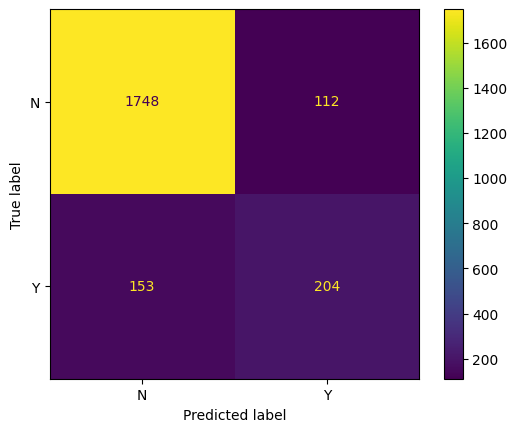

In [30]:
evaluar_modelo(lreg, test_data, test_labels)

#### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

with mlflow.start_run(run_name='KNN'):
    knn = KNeighborsClassifier(n_neighbors=50, 
                               algorithm = 'ball_tree', 
                               leaf_size = 25)

    knn.fit(train_data, train_labels)

Rendimiento obtenido: 0.8385205232295896
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.84      1.00      0.91      1860
           Y       0.33      0.00      0.01       357

    accuracy                           0.84      2217
   macro avg       0.59      0.50      0.46      2217
weighted avg       0.76      0.84      0.77      2217

Matriz de confusión:


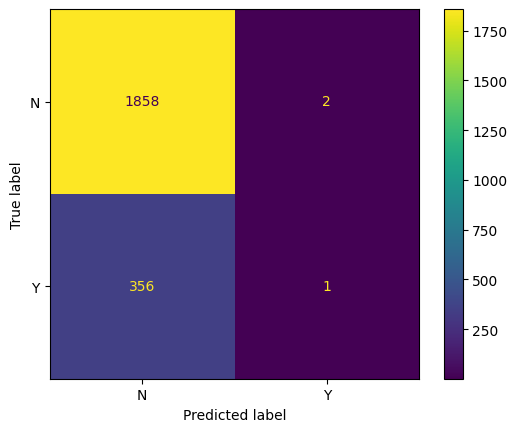

In [32]:
evaluar_modelo(knn, test_data, test_labels)

#### Árboles de Decisión (TDIDT)

In [33]:
from sklearn.tree import DecisionTreeClassifier

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10, random_state=seed)

    dtc.fit(train_data, train_labels)

Rendimiento obtenido: 0.8854307622913847
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.93      0.94      0.93      1860
           Y       0.66      0.61      0.63       357

    accuracy                           0.89      2217
   macro avg       0.79      0.77      0.78      2217
weighted avg       0.88      0.89      0.88      2217

Matriz de confusión:


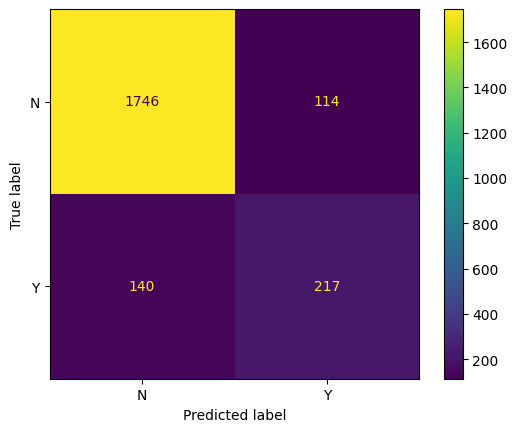

In [34]:
evaluar_modelo(dtc, test_data, test_labels)

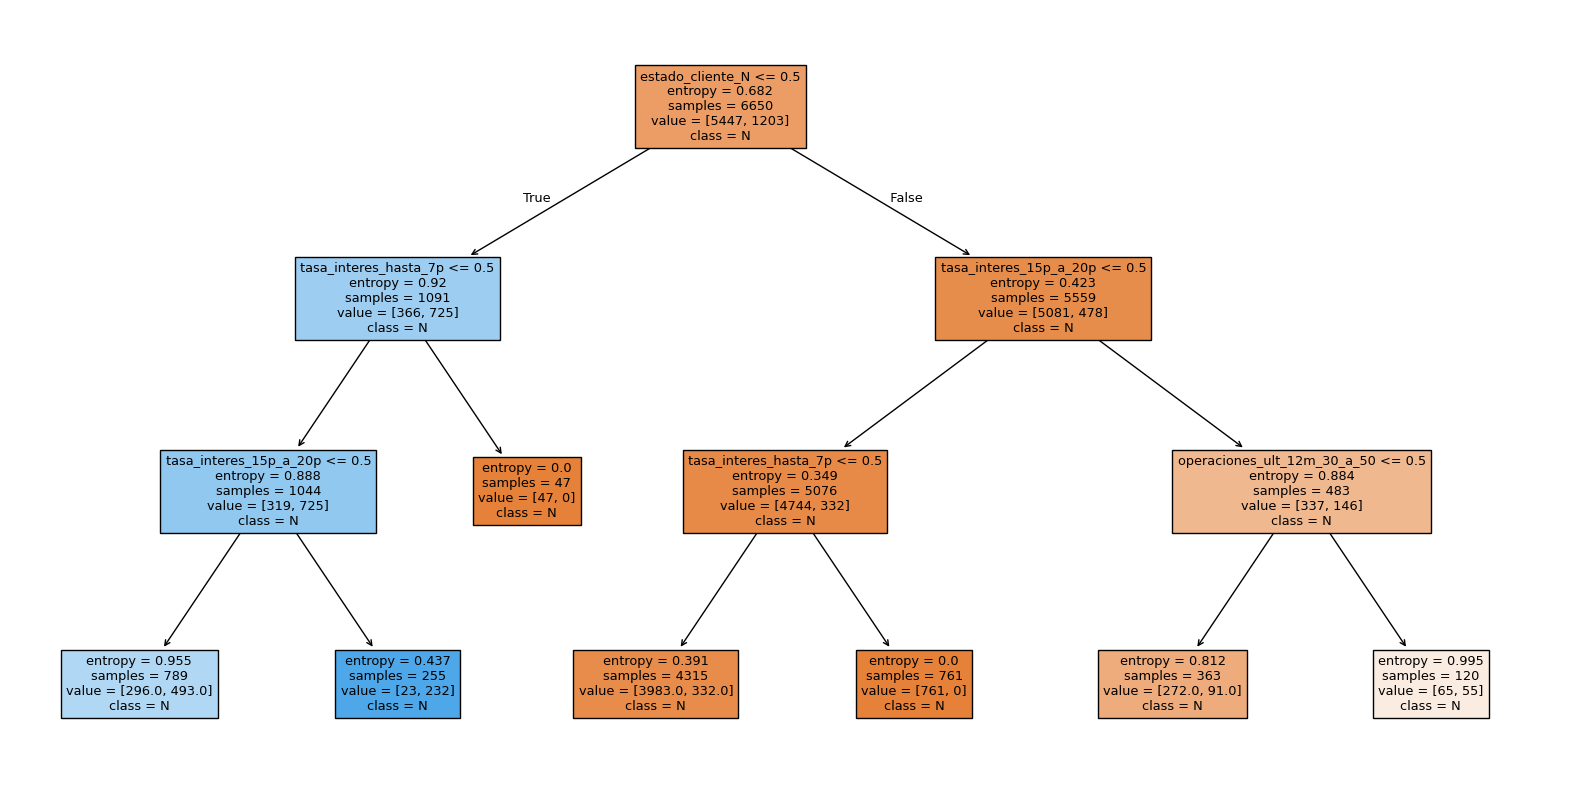

In [35]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

#### Métodos de ensamblado de modelos: RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run(run_name='Random Forest'):
    rndf = RandomForestClassifier(n_estimators=10, random_state=seed)
    rndf.fit(train_data, train_labels)

Rendimiento obtenido: 0.8750563824988723
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.96      0.93      1860
           Y       0.67      0.44      0.53       357

    accuracy                           0.88      2217
   macro avg       0.79      0.70      0.73      2217
weighted avg       0.86      0.88      0.86      2217

Matriz de confusión:


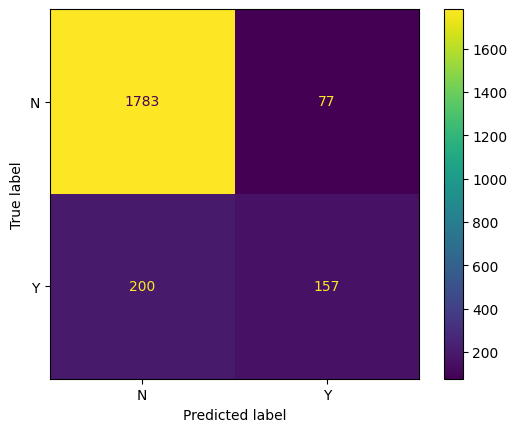

In [37]:
evaluar_modelo(rndf, test_data, test_labels)

----
Prueba #2

In [38]:
mlflow.set_experiment(experiment_name="Prueba #2")


2024/11/24 21:10:20 INFO mlflow.tracking.fluent: Experiment with name 'Prueba #2' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/Acer/Downloads/Rodrigo/Metodolog%C3%ADa/Portafolio/notebooks/04_modelado-evaluacion/mlruns/497037403316858454', creation_time=1732500620790, experiment_id='497037403316858454', last_update_time=1732500620790, lifecycle_stage='active', name='Prueba #2', tags={}>

Regresión logística

In [ ]:
with mlflow.start_run(run_name='Logistic Regression'):
    # Definir el modelo con parámetros optimizados
    lreg2 = LogisticRegression(
        solver='liblinear',      # Algoritmo para optimización
        random_state=seed,       # Semilla para reproducibilidad
        penalty='l1',            # Regularización 
        C=1.0,                  # Fuerza de regularización 
 
        max_iter=200             # Número de iteraciones máximo
    )
    # Entrenar el modelo
    lreg2.fit(train_data, train_labels)
    
    # Registrar parámetros con MLflow
    mlflow.log_param("solver", "liblinear")
    mlflow.log_param("penalty", "l1")
    mlflow.log_param("C", 1.0)
    mlflow.log_param("max_iter", 200)

Rendimiento obtenido: 0.8822733423545331
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.94      0.93      1860
           Y       0.65      0.59      0.62       357

    accuracy                           0.88      2217
   macro avg       0.79      0.76      0.77      2217
weighted avg       0.88      0.88      0.88      2217

Matriz de confusión:


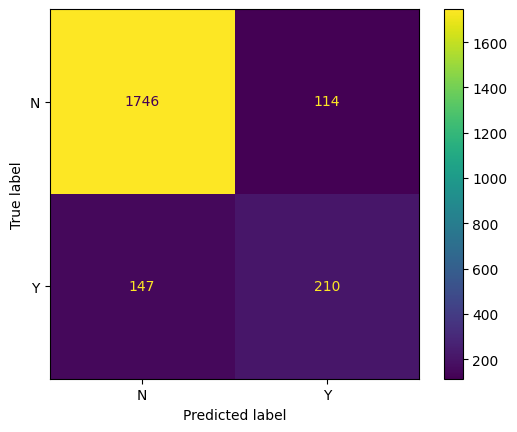

In [47]:
evaluar_modelo(lreg2, test_data, test_labels)

Árbol decisión

In [61]:
with mlflow.start_run(run_name='Decision Tree (#3)'):
    dtc = DecisionTreeClassifier(
        max_depth=4,
        criterion='entropy',
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        max_leaf_nodes=20,
        random_state=seed
    )

    dtc.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8610735227785296
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.93      0.92      1860
           Y       0.58      0.48      0.53       357

    accuracy                           0.86      2217
   macro avg       0.74      0.71      0.72      2217
weighted avg       0.85      0.86      0.86      2217

Matriz de confusión:


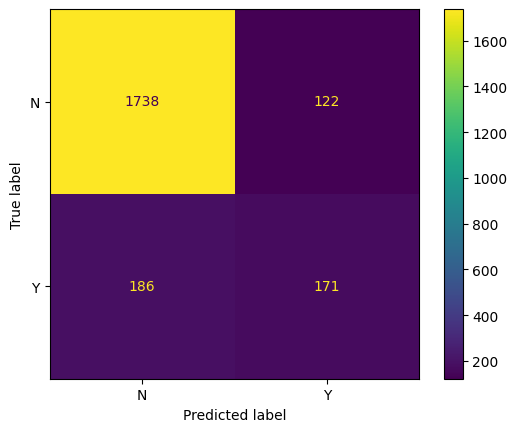

In [62]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(dtc, test_data, test_labels)

Random Forest: Ensemble

In [50]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run(run_name='Random Forest'):
    # Definir el modelo con parámetros optimizados
    rndf2 = RandomForestClassifier(
        n_estimators=100,           # Aumentar el número de árboles
        max_depth=10,               # Limitar la profundidad del árbol
        min_samples_split=10,       # Número mínimo de muestras para dividir un nodo
        min_samples_leaf=5,         # Número mínimo de muestras por hoja
        max_features='sqrt',       # Usar la raíz cuadrada de las características
        bootstrap=True,             # Usar el muestreo con reemplazo
        oob_score=True,             # Evaluación fuera de la bolsa
        random_state=seed           # Semilla para reproducibilidad
    )
    
    # Entrenar el modelo
    rndf2.fit(train_data, train_labels)
    
    # Registrar parámetros con MLflow
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)
    mlflow.log_param("min_samples_split", 10)
    mlflow.log_param("min_samples_leaf", 5)
    mlflow.log_param("max_features", 'sqrt')
    mlflow.log_param("bootstrap", True)
    mlflow.log_param("oob_score", True)

Rendimiento obtenido: 0.8836265223274695
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.97      0.93      1860
           Y       0.73      0.43      0.55       357

    accuracy                           0.88      2217
   macro avg       0.82      0.70      0.74      2217
weighted avg       0.87      0.88      0.87      2217

Matriz de confusión:


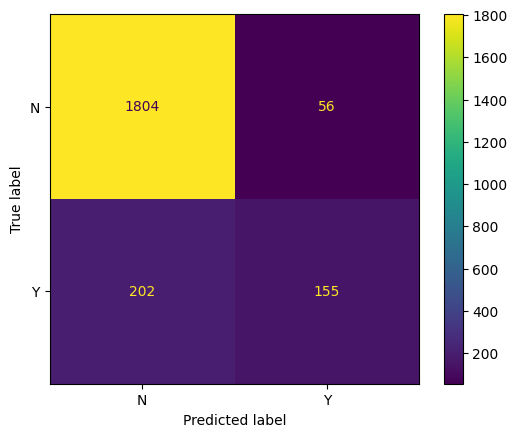

In [51]:
evaluar_modelo(rndf2, test_data, test_labels)

Voting Classifier

In [70]:
from sklearn.ensemble import VotingClassifier
# Crear un VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lreg2), 
        ('dt', dtc), 
        ('rf', rndf2)
    ],
    voting='soft',  # Cambiar a 'soft' para que se usen las probabilidades de los modelos
    weights=[1, 1, 2]  # Pesos para los modelos
)

# Entrenar el VotingClassifier
with mlflow.start_run(run_name='Voting Classifier'):
    voting_clf.fit(train_data, train_labels)

    # Registrar parámetros con MLflow
    mlflow.log_param("model_1", "Logistic Regression (L1)")
    mlflow.log_param("model_2", "Decision Tree")
    mlflow.log_param("model_3", "Random Forest")
    mlflow.log_param("weights", "[1, 1, 2]")  # Pesos asignados a los modelos
    mlflow.log_param("voting", "soft")
    
    # Registrar el modelo entrenado
    mlflow.sklearn.log_model(voting_clf, "voting_model")

2024/11/24 21:42:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Rendimiento obtenido: 0.8791159224176816
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.95      0.93      1860
           Y       0.66      0.52      0.58       357

    accuracy                           0.88      2217
   macro avg       0.78      0.73      0.75      2217
weighted avg       0.87      0.88      0.87      2217

Matriz de confusión:


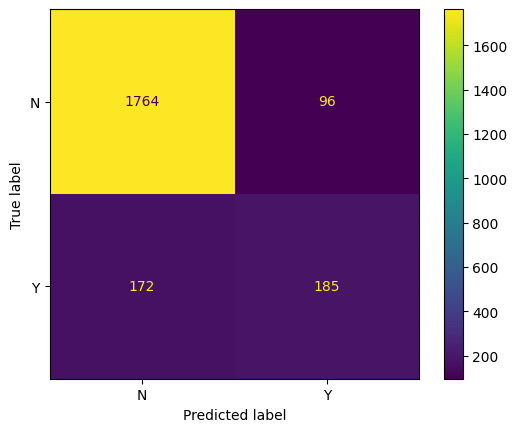

In [71]:
evaluar_modelo(voting_clf, test_data, test_labels)

Prueba 3

In [72]:
mlflow.set_experiment(experiment_name="Prueba #3")


2024/11/24 21:47:21 INFO mlflow.tracking.fluent: Experiment with name 'Prueba #3' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/Acer/Downloads/Rodrigo/Metodolog%C3%ADa/Portafolio/notebooks/04_modelado-evaluacion/mlruns/573136826878892789', creation_time=1732502841242, experiment_id='573136826878892789', last_update_time=1732502841242, lifecycle_stage='active', name='Prueba #3', tags={}>

Regresión logística

In [89]:
# Paso 1: RandomizedSearchCV para explorar el espacio de parámetros
param_dist = {
    'C': np.logspace(-6, 6, 30),  # Parámetro de regularización: más amplio y más valores
    'penalty': ['l1', 'l2'],  # Limitar 'penalty' a 'l1' o 'l2' para evitar errores
    'max_iter': [100, 200, 400, 800, 1000, 2000],  # Mayor rango para iteraciones
    'tol': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],    # Ampliar el rango de tolerancia para la convergencia
    'solver': ['liblinear', 'saga'],  # 'newton-cg' eliminado para evitar problemas con 'l1'
    'fit_intercept': [True, False],   
}

random_search = RandomizedSearchCV(
    lreg2, param_distributions=param_dist, 
    n_iter=50, cv=5, random_state=seed, n_jobs=-1, verbose=1
)

# Entrenar el modelo con RandomizedSearchCV
with mlflow.start_run(run_name='Logistic Regression Random Search'):
    random_search.fit(train_data, train_labels)
    
    # Mejor combinación de parámetros
    best_params_random = random_search.best_params_
    print("Mejores parámetros encontrados por RandomizedSearchCV:", best_params_random)
    
    # Registrar parámetros con MLflow
    for param, value in best_params_random.items():
        mlflow.log_param(param, value)
    mlflow.sklearn.log_model(random_search.best_estimator_, "random_search_model")

# Paso 2: GridSearchCV para refinar los parámetros encontrados en RandomizedSearchCV

# Definir el modelo base con los mejores parámetros obtenidos en RandomizedSearchCV
lreg2_refined = LogisticRegression(
    solver=best_params_random['solver'],  # Usar el solver optimizado de RandomizedSearchCV
    penalty=best_params_random['penalty'],  # Usar el mejor valor de 'penalty' de RandomizedSearchCV
    random_state=seed
)

# Refinar la búsqueda alrededor de los mejores parámetros encontrados
param_grid = {
    'C': [best_params_random['C'] / 10, best_params_random['C'], best_params_random['C'] * 10],  # Refinar alrededor del mejor 'C'
    'max_iter': [best_params_random['max_iter'] - 50, best_params_random['max_iter'], best_params_random['max_iter'] + 50],  # Refinar 'max_iter'
    'tol': [best_params_random['tol'] / 10, best_params_random['tol'], best_params_random['tol'] * 10],  # Refinar 'tol'
}

grid_search = GridSearchCV(
    lreg2_refined, param_grid=param_grid, 
    cv=5, n_jobs=-1, verbose=1
)

# Entrenar el modelo con GridSearchCV para refinar los parámetros
with mlflow.start_run(run_name='Logistic Regression Grid Search Refinado'):
    grid_search.fit(train_data, train_labels)
    
    # Mejor combinación de parámetros refinados
    best_params_grid = grid_search.best_params_
    print("Mejores parámetros refinados por GridSearchCV:", best_params_grid)
    
    # Registrar parámetros con MLflow
    for param, value in best_params_grid.items():
        mlflow.log_param(param, value)
    
    # Guardar el modelo refinado
    mlflow.sklearn.log_model(grid_search.best_estimator_, "grid_search_refined_model")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


2024/11/24 22:26:59 INFO mlflow.sklearn.utils: Logging the 5 best runs, 45 runs will be omitted.


Mejores parámetros encontrados por RandomizedSearchCV: {'tol': 1e-05, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'fit_intercept': False, 'C': np.float64(0.2395026619987486)}


2024/11/24 22:27:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


2024/11/24 22:27:08 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.


Mejores parámetros refinados por GridSearchCV: {'C': np.float64(0.2395026619987486), 'max_iter': 950, 'tol': 1.0000000000000002e-06}


2024/11/24 22:27:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Rendimiento obtenido: 0.8800180423996391
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.94      0.93      1860
           Y       0.64      0.57      0.61       357

    accuracy                           0.88      2217
   macro avg       0.78      0.76      0.77      2217
weighted avg       0.88      0.88      0.88      2217

Matriz de confusión:


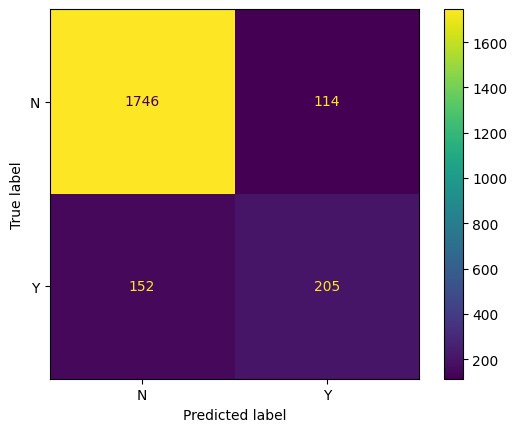

In [90]:
evaluar_modelo(grid_search.best_estimator_, test_data, test_labels)

Random Forest Ensemble

Este proceso puede demorar 4 min

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Definir el espacio de parámetros para RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [10, 50, 100, 200],  # Número de árboles
    'max_depth': [5, 10, 15, None],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
    'bootstrap': [True, False]  # Si usar muestreo bootstrap
}

# Aplicar RandomizedSearchCV
with mlflow.start_run(run_name='Random Forest with RandomizedSearch'):
    rndf = RandomForestClassifier(random_state=seed)
    random_search_rf = RandomizedSearchCV(
        rndf, param_distributions=param_dist_rf, n_iter=10, random_state=seed, cv=5, scoring='accuracy'
    )
    
    # Ajustar el modelo con la búsqueda aleatoria de hiperparámetros
    random_search_rf.fit(train_data, train_labels)
    best_params_random = random_search_rf.best_params_
    best_score_random = random_search_rf.best_score_

# Refinamiento con GridSearchCV
param_grid_rf = {
    'n_estimators': [best_params_random['n_estimators'], 150, 200],
    'max_depth': [best_params_random['max_depth'], 20, None],
    'min_samples_split': [best_params_random['min_samples_split'], 15],
    'min_samples_leaf': [best_params_random['min_samples_leaf'], 3],
    'bootstrap': [best_params_random['bootstrap'], False]
}

# Aplicar GridSearchCV para refinar los hiperparámetros
with mlflow.start_run(run_name='Random Forest with GridSearch'):
    grid_search_rf = GridSearchCV(
        rndf, param_grid=param_grid_rf, cv=5, scoring='accuracy'
    )

    # Ajustar el modelo con la búsqueda en cuadrícula
    grid_search_rf.fit(train_data, train_labels)

    # Obtener los mejores parámetros de GridSearch
    best_params_grid = grid_search_rf.best_params_
    best_score_grid = grid_search_rf.best_score_
    
# Obtener el mejor modelo entrenado
RF_model = grid_search_rf.best_estimator_

c:\Users\Acer\Downloads\Rodrigo\Metodología\Portafolio\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
2024/11/24 22:29:23 INFO mlflow.sklearn.utils: Logging the 5 best runs, 5 runs will be omitted.
2024/11/24 22:33:18 INFO mlflow.sklearn.utils: Logging the 5 best runs, 67 runs will be omitted.


Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8822733423545331
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.96      0.93      1860
           Y       0.69      0.49      0.57       357

    accuracy                           0.88      2217
   macro avg       0.80      0.72      0.75      2217
weighted avg       0.87      0.88      0.87      2217

Matriz de confusión:


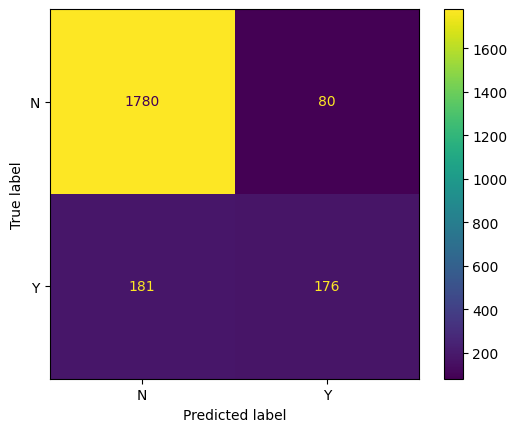

In [92]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(RF_model, test_data, test_labels)

Stacking Classifier

In [94]:
from sklearn.ensemble import StackingClassifier

estimadores = [
    ('log_reg', random_search.best_estimator_),  # Mejor modelo de regresión logística
    ('rf', grid_search_rf.best_estimator_)      # Mejor modelo de Random Forest
]

# Definir el meta-modelo (blender)
meta_model = LogisticRegression()

# Crear el Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=estimadores,  # Los modelos base
    final_estimator=meta_model,  # El modelo final
    cv=5,  # Validación cruzada interna
    n_jobs=-1  # Usar todos los núcleos disponibles para el cálculo
)

with mlflow.start_run(run_name='Stacking Classifier'):
    stacking_clf.fit(train_data, train_labels)
    
    # Registrar el modelo entrenado con MLflow
    mlflow.sklearn.log_model(stacking_clf, "stacking_classifier_model")
    
    # Obtener los parámetros y registrar
    mlflow.log_param('estimators', estimadores)
    mlflow.log_param('meta_model', str(meta_model))




2024/11/24 22:37:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8890392422192152
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.95      0.93      1860
           Y       0.69      0.57      0.62       357

    accuracy                           0.89      2217
   macro avg       0.80      0.76      0.78      2217
weighted avg       0.88      0.89      0.88      2217

Matriz de confusión:


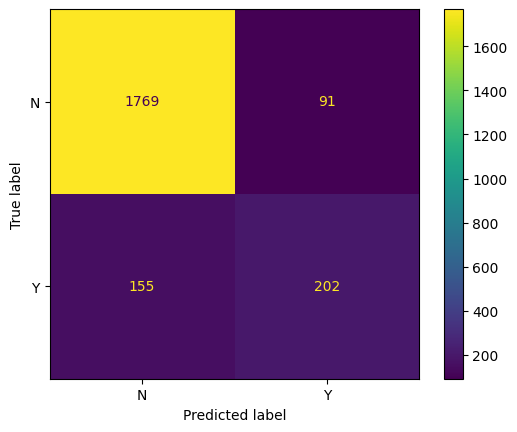

In [95]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(stacking_clf, test_data, test_labels)

Voting Classifier

In [97]:
estimadores = [
    ('log_reg', random_search.best_estimator_),  # Mejor modelo de regresión logística
    ('rf', grid_search_rf.best_estimator_)      # Mejor modelo de Random Forest
]

voting_clf2 = VotingClassifier(
    estimators=estimadores,  # Los modelos base
    voting='hard',           # Puede ser 'hard' o 'soft'
    n_jobs=-1                # Usar todos los núcleos disponibles para el cálculo
)

with mlflow.start_run(run_name='Voting Classifier'):
    voting_clf2.fit(train_data, train_labels)
    
    # Registrar el modelo entrenado con MLflow
    mlflow.sklearn.log_model(voting_clf2, "voting_classifier_model")
    
    # Registrar los parámetros de los estimadores base
    for name, model in estimadores:
        mlflow.log_param(f'base_model_{name}', str(model))

2024/11/24 22:40:34 WARNING mlflow.sklearn.utils: RocCurveDisplay.from_estimator failed. The artifact training_roc_curve will not be recorded. Artifact error: VotingClassifier has none of the following attributes: predict_proba, decision_function.
2024/11/24 22:40:34 WARNING mlflow.sklearn.utils: PrecisionRecallDisplay.from_estimator failed. The artifact training_precision_recall_curve will not be recorded. Artifact error: VotingClassifier has none of the following attributes: predict_proba, decision_function.
2024/11/24 22:40:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8822733423545331
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.96      0.93      1860
           Y       0.70      0.47      0.56       357

    accuracy                           0.88      2217
   macro avg       0.80      0.71      0.75      2217
weighted avg       0.87      0.88      0.87      2217

Matriz de confusión:


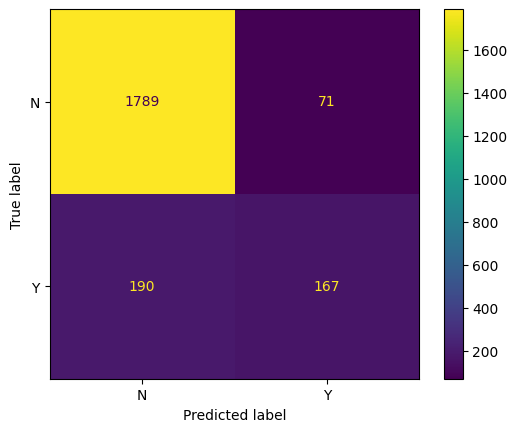

In [98]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(voting_clf2, test_data, test_labels)

----

### Prueba de despliegue (utilzando datos nuevos)

In [99]:
datos_nuevos = pd.read_csv('../../data/final/datos_nuevos.csv', sep=';')
datos_nuevos.head(5)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,708510993,22,4000,4,3.0,HIPOTECA,62000,PERSONAL,0.06,6.76,...,47,SOLTERO,ACTIVO,15478.0,F,4905.0,UNIVERSITARIO_INCOMPLETO,Blue,109.0,1.0
1,708512051,25,10000,2,3.0,ALQUILER,120000,INVERSIONES,0.08,9.32,...,18,CASADO,ACTIVO,3950.0,M,1663.0,UNIVERSITARIO_COMPLETO,Blue,82.0,3.0
2,708513258,23,1700,2,2.0,HIPOTECA,45000,SALUD,0.04,14.72,...,29,CASADO,ACTIVO,3078.0,M,4323.0,UNIVERSITARIO_INCOMPLETO,Blue,58.0,1.0
3,708514512,25,7200,4,0.0,ALQUILER,71604,PAGO_DEUDAS,0.10,10.95,...,29,CASADO,ACTIVO,4314.0,F,3809.0,UNIVERSITARIO_INCOMPLETO,Blue,81.0,2.0
4,708515472,26,5000,3,5.0,HIPOTECA,52000,PAGO_DEUDAS,0.10,10.59,...,36,CASADO,ACTIVO,4216.0,F,4712.0,SECUNDARIO_COMPLETO,Blue,82.0,1.0


**Importante**: recordar que si se implementan operaciones de transformación sobre los datos será necesario (posiblemente) replicarlas sobre los datos nuevos para que ambos datasets sean compatibles.

#### Se tienen que aplicar las adaptaciones realizadas sobre los datos de entrenamiento

In [100]:
# Columna: estado_civil
cambios_estado_civil = {
    'CASADO' : 'C',
    'SOLTERO' : 'S',
    'DESCONOCIDO' : 'N',
    'DIVORCIADO' : 'D',
}

estado_civil_N = datos_nuevos.loc[:, ('estado_civil')].map(cambios_estado_civil).rename('estado_civil')

# Columna: estado_credito
cambios_estado_credito = {
    0: 'C',
    1 : 'P',
}

estado_credito_N = datos_nuevos.loc[:, ('estado_credito')].map(cambios_estado_credito).rename('estado_credito')

# df_final = pd.concat([estado_civil_N, estado_credito_N, df_integrado], axis=1)
# df_final.head()

# Antiguedad del empleado

etiquetas_a_e = ['menor_10', '5_a_10', 'mayor_10']
rangos_a_e = [0, 4, 10, 50]
valor_para_nan = 'NA'
antiguedad_empleados_N = pd.cut(datos_nuevos['antiguedad_empleado'], 
                                bins=rangos_a_e, 
                                labels=etiquetas_a_e,
                                right=False).cat.add_categories(valor_para_nan).fillna(valor_para_nan)

# antiguedad_empleados_N.value_counts()

# edad

etiquetas_e = ['menor_25', '25_a_30']
rangos_e = [0, 24, 50]
edad_N = pd.cut(datos_nuevos['edad'], 
                                bins=rangos_e, 
                                labels=etiquetas_e)

# edad_N.value_counts()

# pct_ingreso

etiquetas_p_i = ['hasta_20', '20_a_40', '40_a_60', 'mayor_60']
rangos_p_i = [0, 0.19, 0.39, 0.60, 0.99]
pct_ingreso_N = pd.cut(datos_nuevos['pct_ingreso'], 
                                bins=rangos_p_i, 
                                labels=etiquetas_p_i)

# pct_ingreso_N.value_counts()

# ingresos

etiquetas_i = ['hasta_20k', '20k_a_50k', '50k_a_100k', 'mayor_100k']
rangos_i = [0, 19999, 49999, 99999, 999999]
ingresos_N = pd.cut(datos_nuevos['ingresos'], 
                                bins=rangos_i, 
                                labels=etiquetas_i)

# ingresos_N.value_counts()

# tasa_interes

etiquetas_t_i = ['hasta_7p', '7p_a_15p', '15p_a_20p', 'mayor_20p']
rangos_t_i = [0, 6.99, 14.99, 19.99, 100]
tasa_interes_N = pd.cut(datos_nuevos['tasa_interes'], 
                                bins=rangos_t_i, 
                                labels=etiquetas_t_i)

# tasa_interes_N.value_counts()

# antiguedad_cliente

etiquetas_a_c = ['menor_2y', '2y_a_4y', 'mayor_4y']
rangos_a_c = [0, 24, 48, 100]
antiguedad_cliente_N = pd.cut(datos_nuevos['antiguedad_cliente'], 
                                bins=rangos_a_c, 
                                labels=etiquetas_a_c)

# antiguedad_cliente_N.value_counts()

# limite_credito_tc

etiquetas_l_tc = ['menor_3k', '3k_a_5k', '5k_a_10k', 'mayor_10k']
rangos_l_tc = [0, 2999, 4999, 9999, 100000]
limite_credito_tc_N = pd.cut(datos_nuevos['limite_credito_tc'], 
                                bins=rangos_l_tc, 
                                labels=etiquetas_l_tc)

# limite_credito_tc_N.value_counts()

# gastos_ult_12m

etiquetas_g_u12 = ['menor_1k', '2k_a_4k', '4k_a_6k', '6k_a_8k', '8k_a_10k', 'mayor_10k']
rangos_g_u12 = [0, 999, 3999, 5999, 7999, 9999, 100000]
gastos_ult_12m_N = pd.cut(datos_nuevos['gastos_ult_12m'], 
                                bins=rangos_g_u12, 
                                labels=etiquetas_g_u12)

# gastos_ult_12m_N.value_counts()

# operaciones_ult_12m

etiquetas_o_u12 = ['menor_15', '15_a_30', '30_a_50', '50_a_75', '75_a_100', 'mayor_100']
rangos_o_u12 = [0, 14, 29, 49, 74, 99, 1000]
operaciones_ult_12m_N = pd.cut(datos_nuevos['operaciones_ult_12m'], 
                                bins=rangos_o_u12, 
                                labels=etiquetas_o_u12)

# operaciones_ult_12m_N.value_counts()

col_eliminar_final = [
              'edad',
              'antiguedad_empleado',
              'antiguedad_cliente', 
              'ingresos',
              'pct_ingreso', 
              'tasa_interes',
              'gastos_ult_12m', 
              'limite_credito_tc', 
              'operaciones_ult_12m',
              'nivel_tarjeta',
              'estado_civil',
              'estado_credito',
              'id_cliente']

datos_nuevos.drop(col_eliminar_final, inplace=True, axis=1)


df_nuevo = pd.concat([operaciones_ult_12m_N, gastos_ult_12m_N, limite_credito_tc_N, antiguedad_cliente_N, tasa_interes_N, ingresos_N, pct_ingreso_N, antiguedad_empleados_N, edad_N, estado_civil_N, estado_credito_N, datos_nuevos], axis=1)
df_nuevo.head(5)

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil,estado_credito,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,hasta_7p,50k_a_100k,hasta_20,menor_10,menor_25,S,C,4000,4,HIPOTECA,PERSONAL,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,1.0
1,75_a_100,2k_a_4k,menor_3k,menor_2y,7p_a_15p,mayor_100k,hasta_20,menor_10,25_a_30,C,C,10000,2,ALQUILER,INVERSIONES,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,50_a_75,2k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,20k_a_50k,hasta_20,menor_10,menor_25,C,C,1700,2,HIPOTECA,SALUD,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,1.0
3,75_a_100,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,hasta_20,menor_10,25_a_30,C,C,7200,4,ALQUILER,PAGO_DEUDAS,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0
4,75_a_100,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,hasta_20,5_a_10,25_a_30,C,C,5000,3,HIPOTECA,PAGO_DEUDAS,ACTIVO,F,SECUNDARIO_COMPLETO,1.0


In [101]:
nuevos_codif = pd.get_dummies(df_nuevo)
nuevos_codif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   importe_solicitado                        112 non-null    int64  
 1   duracion_credito                          112 non-null    int64  
 2   personas_a_cargo                          112 non-null    float64
 3   operaciones_ult_12m_menor_15              112 non-null    bool   
 4   operaciones_ult_12m_15_a_30               112 non-null    bool   
 5   operaciones_ult_12m_30_a_50               112 non-null    bool   
 6   operaciones_ult_12m_50_a_75               112 non-null    bool   
 7   operaciones_ult_12m_75_a_100              112 non-null    bool   
 8   operaciones_ult_12m_mayor_100             112 non-null    bool   
 9   gastos_ult_12m_menor_1k                   112 non-null    bool   
 10  gastos_ult_12m_2k_a_4k                

In [102]:
# Dado que puede haber diferencias con el set de entrenamiento se emparejan

columnas_faltantes = set(data.columns) - set(nuevos_codif.columns)
display(columnas_faltantes)
for columna in columnas_faltantes:
    nuevos_codif[columna] = 0 # Se agregan las columnas faltantes con valor 0

print('Datos nuevos: ' + str(len(nuevos_codif.columns)))
print('Datos entrenamiento: ' + str(len(data.columns)))
print(set(data.columns) - set(nuevos_codif.columns))

{'antiguedad_empleado_4_a_9  ',
 'antiguedad_empleado_menor_4',
 'edad_mayor_25',
 'edad_menor_24',
 'estado_civil_N_C',
 'estado_civil_N_D',
 'estado_civil_N_N',
 'estado_civil_N_S',
 'estado_cliente_N',
 'estado_credito_N_C',
 'estado_credito_N_P',
 'gastos_ult_12m_1k_a_4k',
 'pct_ingreso_19_a_39',
 'pct_ingreso_39_a_60',
 'pct_ingreso_hasta_18',
 'situacion_vivienda_OTROS'}

Datos nuevos: 81
Datos entrenamiento: 63
set()


In [103]:
nuevos_codif = nuevos_codif[data.columns]
nuevos_codif.columns

Index(['importe_solicitado', 'duracion_credito', 'estado_cliente_N',
       'personas_a_cargo', 'operaciones_ult_12m_15_a_30',
       'operaciones_ult_12m_30_a_50', 'operaciones_ult_12m_50_a_75',
       'operaciones_ult_12m_75_a_100', 'operaciones_ult_12m_mayor_100',
       'operaciones_ult_12m_menor_15', 'gastos_ult_12m_1k_a_4k',
       'gastos_ult_12m_4k_a_6k', 'gastos_ult_12m_6k_a_8k',
       'gastos_ult_12m_8k_a_10k', 'gastos_ult_12m_mayor_10k',
       'gastos_ult_12m_menor_1k', 'limite_credito_tc_3k_a_5k',
       'limite_credito_tc_5k_a_10k', 'limite_credito_tc_mayor_10k',
       'limite_credito_tc_menor_3k', 'antiguedad_cliente_2y_a_4y',
       'antiguedad_cliente_mayor_4y', 'antiguedad_cliente_menor_2y',
       'tasa_interes_15p_a_20p', 'tasa_interes_7p_a_15p',
       'tasa_interes_hasta_7p', 'tasa_interes_mayor_20p', 'ingresos_20k_a_50k',
       'ingresos_50k_a_100k', 'ingresos_hasta_20k', 'ingresos_mayor_100k',
       'pct_ingreso_19_a_39', 'pct_ingreso_39_a_60', 'pct_ingreso_

In [104]:
# Se hace la predicción con los nuevos datos

prediccion_nuevos = dtc.predict(nuevos_codif)

prediccionDF = pd.DataFrame(prediccion_nuevos)

2024/11/24 22:57:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Acer\Downloads\Rodrigo\Metodología\Portafolio\.venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [105]:
# Se agrega la nueva columna
datos_nuevos['prediccion_mora'] = prediccionDF
datos_nuevos['prediccion_mora'].value_counts()

prediccion_mora
Y    67
N    45
Name: count, dtype: int64